In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('real_estate.csv')
df

,SalePrice,GrLivArea,YearBuilt,OverallQual,LotArea,GarageCars,Neighborhood,HouseStyle
0,18890778.14,1963.088774,1943,9,10734.639410,2,NAmes,2Story
1,15614193.46,2454.708320,1948,1,8742.911199,3,NAmes,2Story
2,19766057.31,800.716213,2003,7,11273.040420,0,Somerst,1Story
3,25701994.22,1781.484618,1974,8,12570.078710,3,NAmes,1Story
4,15171423.35,1174.678715,1960,3,9249.763860,2,Edwards,2Story
...,...,...,...,...,...,...,...,...
495,19131432.08,1359.449854,1984,3,8924.570833,0,Edwards,1.5Fin
496,11923196.42,2398.843263,1917,5,8817.416300,2,Edwards,SLvl
497,15372159.13,1820.421431,1966,5,11779.296420,1,NAmes,1.5Fin
498,12515578.55,1214.410505,1941,4,9720.315592,0,NAmes,2Story


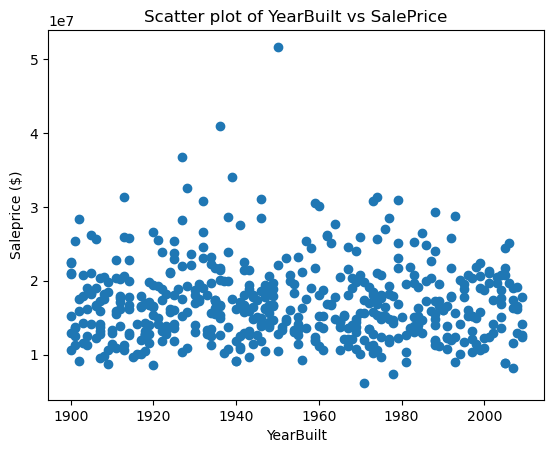

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['YearBuilt'],df['SalePrice'])
plt.title('Scatter plot of YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('Saleprice ($)')
plt.show()

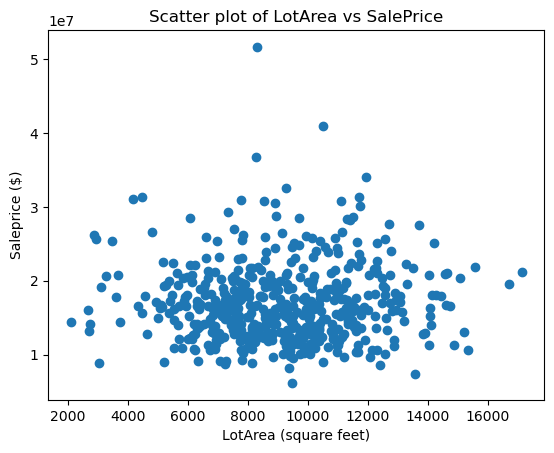

In [7]:
plt.scatter(df['LotArea'],df['SalePrice'])
plt.title('Scatter plot of LotArea vs SalePrice')
plt.xlabel('LotArea (square feet)')
plt.ylabel('Saleprice ($)')
plt.show()

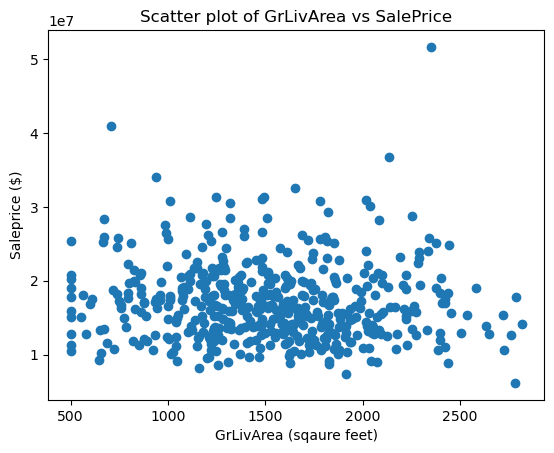

In [6]:
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.title('Scatter plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (sqaure feet)')
plt.ylabel('Saleprice ($)')
plt.show()

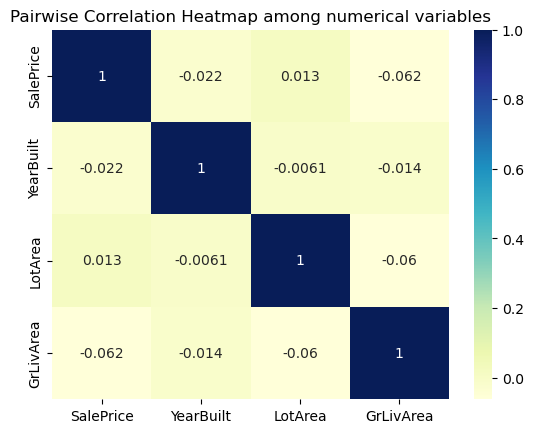

In [8]:
import seaborn as sns
corr = df[['SalePrice','YearBuilt','LotArea','GrLivArea']].corr(numeric_only= True)
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title('Pairwise Correlation Heatmap among numerical variables')
plt.show()

Text(0.5, 1.0, 'Regression Plot of SalePrice vs YearBuilt')

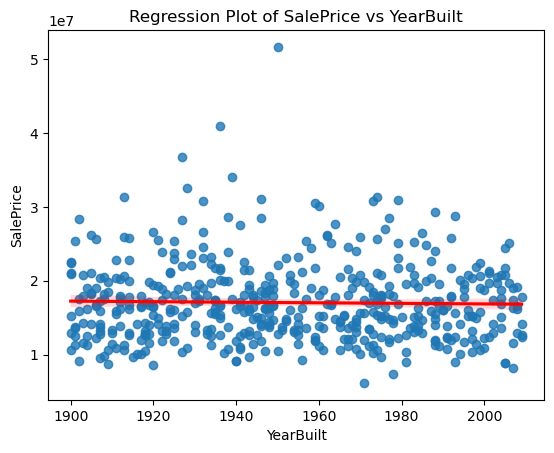

In [41]:
ax = sns.regplot(df, x = 'YearBuilt', y = 'SalePrice',line_kws = dict(color = 'r'))
ax.set_title("Regression Plot of SalePrice vs YearBuilt")

Text(0.5, 1.0, 'Regression Plot of SalePrice vs LotArea')

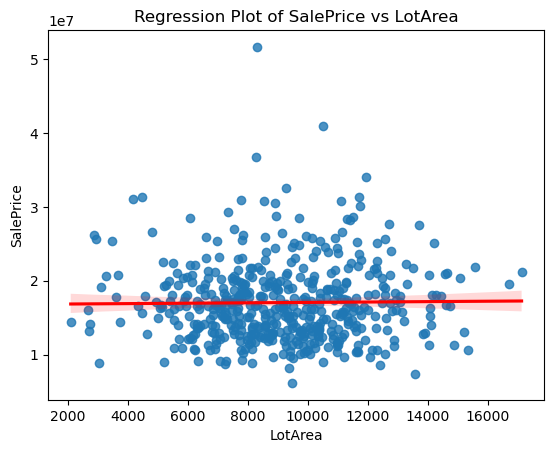

In [40]:
ax = sns.regplot(df, x = 'LotArea', y = 'SalePrice',line_kws = dict(color = 'r'))
ax.set_title("Regression Plot of SalePrice vs LotArea")

Text(0.5, 1.0, 'Regression Plot of SalePrice vs GrLivArea')

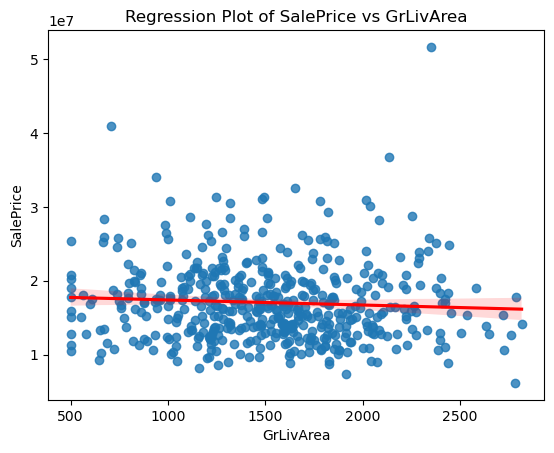

In [42]:
ax = sns.regplot(df, x = 'GrLivArea', y = 'SalePrice',line_kws = dict(color = 'r'))
ax.set_title("Regression Plot of SalePrice vs GrLivArea")

In [43]:
import statsmodels.formula.api as smf
model = smf.ols("SalePrice ~ YearBuilt+ LotArea + GrLivArea", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7476
Date:                Fri, 03 Oct 2025   Prob (F-statistic):              0.524
Time:                        14:47:25   Log-Likelihood:                -8450.5
No. Observations:                 500   AIC:                         1.691e+04
Df Residuals:                     496   BIC:                         1.693e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.556e+07   1.48e+07      1.724      0.0

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [27]:
cubic_model=Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                     ('std_scaler', StandardScaler()),
                     ('lin_reg', LinearRegression())]).fit(pd.DataFrame(df['YearBuilt']),df['SalePrice'])

In [28]:
grid = pd.DataFrame({"YearBuilt": np.linspace(df["YearBuilt"].min(), df["YearBuilt"].max(), 110)})
grid["Cubic_pred"] = cubic_model.predict(grid[["YearBuilt"]])
grid.head()

,YearBuilt,Cubic_pred
0,1900.0,1.608134e+07
1,1901.0,1.616451e+07
2,1902.0,1.624485e+07
3,1903.0,1.632239e+07
4,1904.0,1.639717e+07


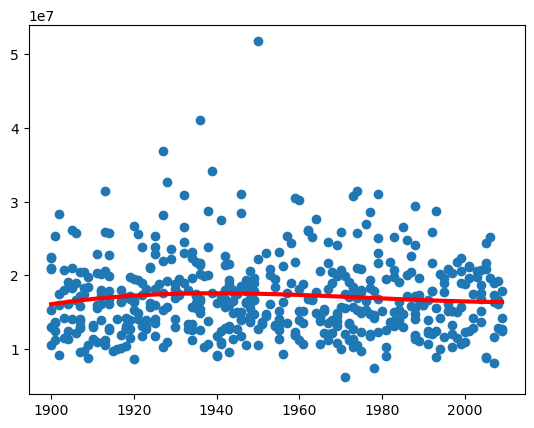

In [29]:
plt.scatter(df['YearBuilt'],df['SalePrice'])
plt.plot(grid['YearBuilt'],grid['Cubic_pred'],linewidth = 3,c = 'r')
plt.show()

In [30]:
cubic_model=Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                     ('std_scaler', StandardScaler()),
                     ('lin_reg', LinearRegression())]).fit(pd.DataFrame(df['LotArea']),df['SalePrice'])

In [31]:
grid = pd.DataFrame({"LotArea": np.linspace(df["LotArea"].min(), df["LotArea"].max(), 110)})
grid["Cubic_pred"] = cubic_model.predict(grid[["LotArea"]])
grid.head()

,LotArea,Cubic_pred
0,2101.006502,1.938540e+07
1,2238.947894,1.925021e+07
2,2376.889286,1.911926e+07
3,2514.830678,1.899250e+07
4,2652.772070,1.886988e+07


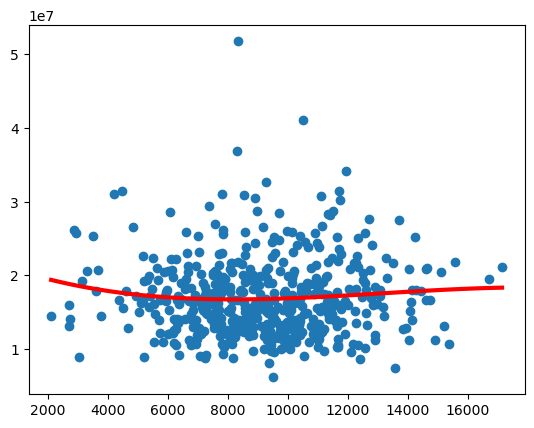

In [32]:
plt.scatter(df['LotArea'],df['SalePrice'])
plt.plot(grid['LotArea'],grid['Cubic_pred'],linewidth = 3,c = 'r')
plt.show()

In [33]:
cubic_model=Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                     ('std_scaler', StandardScaler()),
                     ('lin_reg', LinearRegression())]).fit(pd.DataFrame(df['GrLivArea']),df['SalePrice'])

In [34]:
grid = pd.DataFrame({"GrLivArea": np.linspace(df["GrLivArea"].min(), df["GrLivArea"].max(), 110)})
grid["Cubic_pred"] = cubic_model.predict(grid[["GrLivArea"]])
grid.head()

,GrLivArea,Cubic_pred
0,500.000000,1.830463e+07
1,521.249459,1.824676e+07
2,542.498918,1.819059e+07
3,563.748377,1.813611e+07
4,584.997836,1.808329e+07


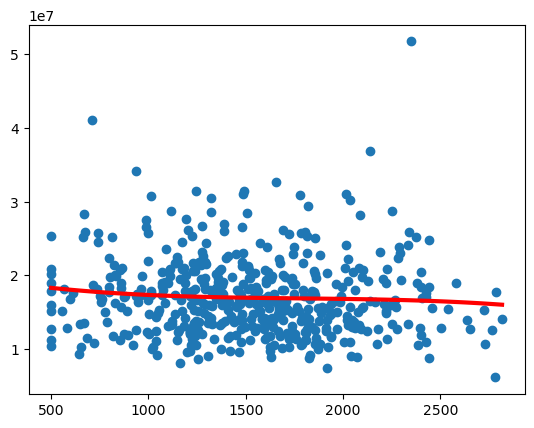

In [35]:
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.plot(grid['GrLivArea'],grid['Cubic_pred'],linewidth = 3,c = 'r')
plt.show()

In [46]:
model = smf.ols("SalePrice ~ YearBuilt+LotArea +GrLivArea+GarageCars +C(Neighborhood)*YearBuilt + C(HouseStyle)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7350
Date:                Fri, 03 Oct 2025   Prob (F-statistic):              0.749
Time:                        15:09:22   Log-Likelihood:                -8446.0
No. Observations:                 500   AIC:                         1.692e+04
Df Residuals:                     484   BIC:                         1.699e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [47]:
X = df[['YearBuilt','LotArea','GrLivArea']]
y = df['SalePrice']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [56]:
from sklearn.preprocessing import SplineTransformer
ols_model = Pipeline([
    ("linreg", LinearRegression())
])


poly3_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

poly2_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

poly5_model = Pipeline([
    ("poly", PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

spline_model = Pipeline([
    ("spline", SplineTransformer(degree=3, n_knots=8, include_bias=False)),
    ("linreg", LinearRegression())
])

models = {
    "OLS (linear)": ols_model,
    "Polynomial (cubic)": poly3_model,
    "Polynomial (quadratic)": poly2_model,
    "Polynomial (fifth degree)": poly5_model,
    "Cubic spline (n_knots=8)": spline_model
}



def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)

    yhat_tr = model.predict(X_train)
    yhat_te = model.predict(X_test)

    rows.append({
        "Model": name,
        "Train RMSE": rmse(y_train, yhat_tr),
        "Test RMSE": rmse(y_test, yhat_te),
        "Train R2": r2_score(y_train, yhat_tr),
        "Test R2": r2_score(y_test, yhat_te),
    })

results = pd.DataFrame(rows).sort_values("Test RMSE")
print(results.round(4))

                       Model    Train RMSE     Test RMSE  Train R2  Test R2
1         Polynomial (cubic)  5.151891e+06  5.349223e+06    0.0445   0.0138
0               OLS (linear)  5.266828e+06  5.363631e+06    0.0014   0.0085
2     Polynomial (quadratic)  5.221879e+06  5.376652e+06    0.0184   0.0037
4   Cubic spline (n_knots=8)  5.023394e+06  5.397114e+06    0.0916  -0.0039
3  Polynomial (fifth degree)  4.797571e+06  5.979308e+06    0.1714  -0.2322


In [59]:
train = pd.concat([X_train,y_train],axis = 1)
model = smf.ols("SalePrice ~ I(YearBuilt**2)+I(LotArea**2) +GrLivArea", data= train).fit()
print(model.summary())
y_pred = model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(test_rmse)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2115
Date:                Fri, 03 Oct 2025   Prob (F-statistic):              0.888
Time:                        15:59:58   Log-Likelihood:                -5913.5
No. Observations:                 350   AIC:                         1.183e+04
Df Residuals:                     346   BIC:                         1.185e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.917e+07   8.88e+0

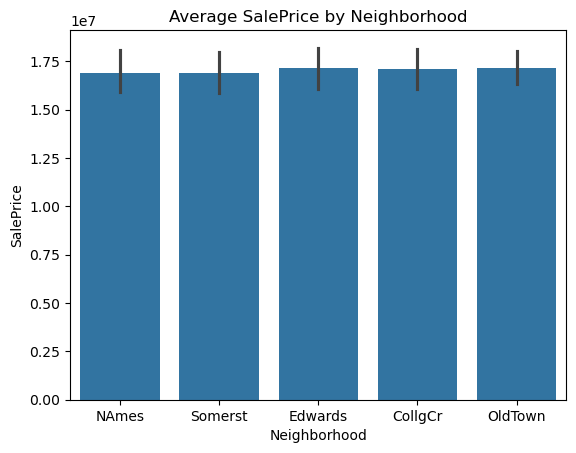

In [50]:
sns.barplot(data = df,x = 'Neighborhood',y = 'SalePrice',estimator='mean')
plt.title('Average SalePrice by Neighborhood')
plt.show()

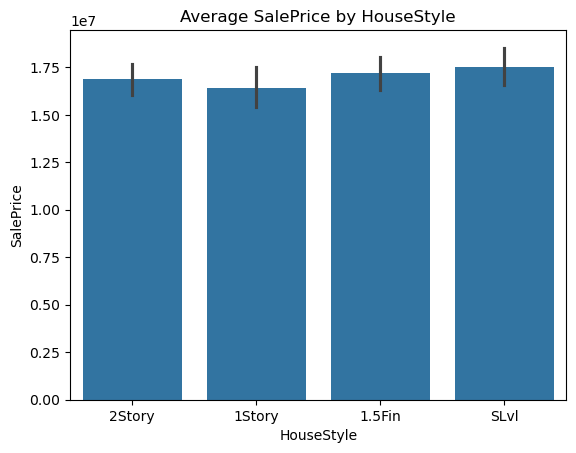

In [51]:
sns.barplot(data = df,x = 'HouseStyle',y = 'SalePrice',estimator='mean')
plt.title('Average SalePrice by HouseStyle')
plt.show()

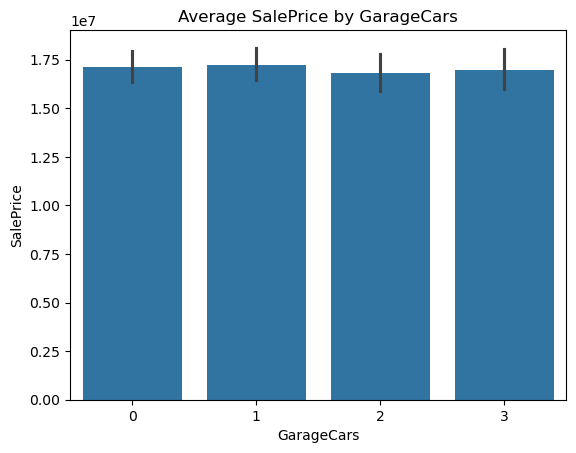

In [53]:
sns.barplot(data = df,x = 'GarageCars',y = 'SalePrice',estimator='mean')
plt.title('Average SalePrice by GarageCars')
plt.show()

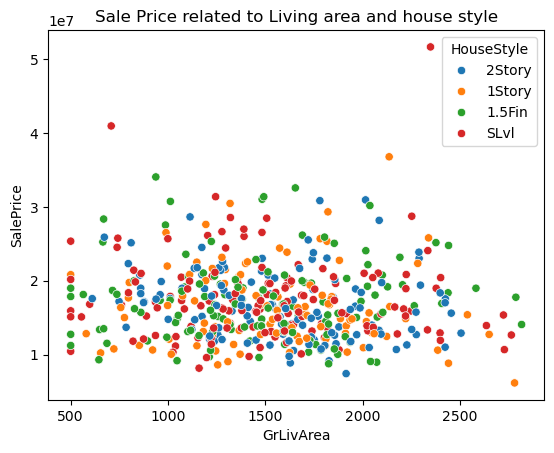

In [55]:
sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice',hue = 'HouseStyle')
plt.title('Sale Price related to Living area and house style')
plt.show()

Linear regression has the highest bias, and lowest variance. Based off test RMSE, it was the second best model. Quadratic polynomial model has lower bias, higher variance, but performed worse on test RMSE. Cubic polynomial had even lower bias, higher variance, and based off test RMSE, it performed the best out of all five models. Cubic spline with 8 knots, and 5th degree polynomial models were extremely overfit with low bias, and high variance, performing really well on the training set, but terribely on the test set.

Polynomial models can help us achieve better evaulation metrics, but they are sometimes too complex to directly interpret. Linear models have advantage in terms of being able to easily explained the importance of the coefficients, and what they represent. Splines are sometimes are trade off interpretability, for a small number of knots, they can be simple to interpret, but as the number of knots increases, it would become increasinly difficult to interpret the model.

Because the real estate agency is more interested in explaining the impact of each predictor on sales price, rather than pure predictive power,I will recommend a linear model with a small number of quadratic terms, even though it did not perform that well on the test set. Interpretability is sometimes more important than raw predictive power. 